In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import fnmatch
import os

experiment = 'mom6_solo_global_ALE_z/'


def listdir(dirname, pattern="*"):
    return fnmatch.filter(os.listdir(dirname), pattern)

def findfiles(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result


stdouts = findfiles("stdout*",experiment)

print(stdouts)

['mom6_solo_global_ALE_z/stdout.ubuntu.Inspiron15i7.pgi18.prod.n8', 'mom6_solo_global_ALE_z/stdout.ubuntu.xpsCentrioDuo.gnu7.prod.n2', 'mom6_solo_global_ALE_z/stdout.gaea4-intel18.prod.n16', 'mom6_solo_global_ALE_z/stdout.ubuntu.Inspiron15i7.pgi18.repro.n4', 'mom6_solo_global_ALE_z/stdout.ubuntu.Inspiron15i7.pgi18.prod.n4', 'mom6_solo_global_ALE_z/stdout.ubuntu.Inspiron15i7.gnu7.prod.n8', 'mom6_solo_global_ALE_z/stdout.gaea4-intel18.prod.n6', 'mom6_solo_global_ALE_z/stdout.gaea4-intel18.prod.n64', 'mom6_solo_global_ALE_z/stdout.tiger-intel18.prod.n8', 'mom6_solo_global_ALE_z/stdout.ubuntu.Inspiron15i7.gnu7.prod.n4', 'mom6_solo_global_ALE_z/stdout.googcp-intel19.prod.n8', 'mom6_solo_global_ALE_z/stdout.ubuntu.Inspiron15i7.gnu7.repro.n4', 'mom6_solo_global_ALE_z/stdout.gaea4-intel18.prod.n4', 'mom6_solo_global_ALE_z/stdout.googcp-intel19.prod.n4', 'mom6_solo_global_ALE_z/stdout.tiger-intel18.prod.n32', 'mom6_solo_global_ALE_z/stdout.gaea4-intel18.prod.n8', 'mom6_solo_global_ALE_z/stdout.

In [22]:
import re
from collections import defaultdict

key = 'Main loop'
timing_regex ='\s*' + re.escape(key) + r'\s* ([-+]?\d*\.\d+|\d+)\s*([-+]?\d*\.\d+|\d+)\s*([-+]?\d*\.\d+|\d+)\s*([-+]?\d*\.\d+|\d+)\s*([-+]?\d*\.\d+|\d+)\s*(\d+)\s*(\d+)\s*(\d+)'

table=defaultdict(list)
for stdout in stdouts:
    n = re.match('(\S+)\/stdout.(.*).n\d+',stdout)
    exp = n.group(1)
    plat= n.group(2)
    for line in open(stdout,"r"):
        m = re.match(timing_regex,line)
        if m:
#            print(1+int(m.group(8)),float(m.group(2)))
            table[plat].append((1+int(m.group(8)),60./float(m.group(2))))
          

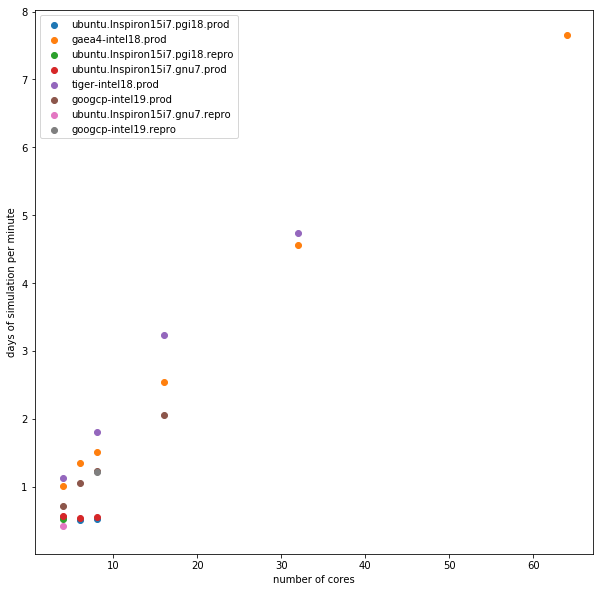

In [25]:
plt.figure(figsize=(10,10))
for k, v in table.items():
    if('Duo' not in k):
        plt.scatter(*zip(*v),label=k)

plt.xlabel('number of cores')
plt.ylabel('days of simulation per minute')
plt.legend()